[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PongthepGeo/ML_22/blob/master/course_objective.ipynb)

### Course objectives

This course aims to solve a problem in crop classification using satellite imagery. The study area is located in Nakhonratchasima province, North-East of Thailand, where farmers plan cassavas, maize, rice, and sugarcane. We are machine learners who will apply ML-based and DL-based approaches to an inference model that can classify crops automatically.

The subjects in this course will cover decision-tree-base methods used [catboost](https://catboost.ai/) and the DL method named U-net. 

#### 1. Install Python libraries

In [ ]:
%pip install geopandas
%pip install matplotlib
%pip install rasterio
%pip install ipykernel

In [ ]:
!pip list

#### 2. Load Python libraries

In [1]:
%matplotlib inline

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt

from rasterio.features import rasterize
from rasterio.plot import show

Adding %matplotlib inline before importing Python libraries can help **matplotlib** plot a static image, whereas %matplotlib notebook is used for interactive visualization.

#### 3. Exploring data 

The metadata contain georeferences that can detach into two main groups, first geocoordinates (strings and vector) and second array (satellite images). We will use **rasterio** and **geopandas** to manipulate the metadata.

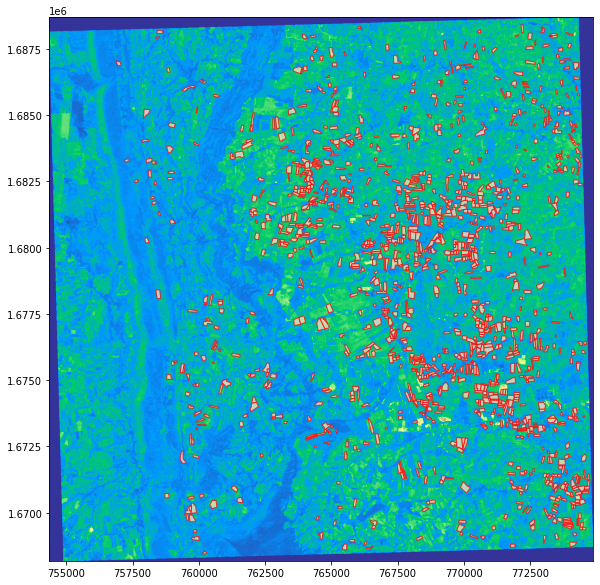

In [9]:
# NOTE import metadata using rasterio, no image yet
img_profile = rasterio.open('../dataset/sentinel_2/2020/20200107/IMG_DATA/47PQS_20200107_B03.jp2').profile
# NOTE import shape file using geopandas
df = gpd.read_file('../dataset/shape_files/traindata.shp').to_crs(img_profile['crs'])
# NOTE convert metadata to raster
target_image = rasterize(shapes=[(row.geometry, int(row.crop_type)) for i, row in df.iterrows()],
                         out_shape=(img_profile['width'], img_profile['height']),
                         transform=img_profile['transform'])
# NOTE import metadata as raster  (no profile)
src = rasterio.open('../dataset/sentinel_2/2020/20200107/IMG_DATA/47PQS_20200107_B03.jp2')
# NOTE plot image overlay with rasters (farm ids) and polygons
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
show(src.read(), transform=src.transform, ax=ax, cmap='terrain')
# show(target_image, cmap='Paired', ax=ax, transform=src.transform)
df.plot(ax = ax, color = 'bisque', edgecolor = 'red', alpha = 0.75)
plt.savefig('pictures/demo' + '.svg', format='svg', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()